In [5]:
import sys
sys.path.append("..")
from utils.utils import order
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
import csv
from IPython.display import Math, Latex, Markdown

In [2]:
# Load the files
bisection = "csv/bisection/bisection_raiz1.csv"
newton = "csv/newton-raphson/newton_general-sem1e-1.csv"
fixed_point = "csv/fixed-point/fixed-point_raiz1.csv"
aitken = "csv/fixed-point/fixed-point_raiz1_aitken.csv"

bisection = pd.read_csv(bisection)
newton = pd.read_csv(newton)
fixed_point = pd.read_csv(fixed_point)
aitken = pd.read_csv(aitken)

In [3]:
# Extract pn values and roots

bisection_pn = np.array(bisection['$p_n$'])
bisection_root = bisection_pn[-1]

newton_pn = np.array(newton['$p_n$'])
newton_root = newton_pn[-1]

fixed_point_pn = np.array(fixed_point['$p_n$'])
fixed_point_root = fixed_point_pn[-1]


aitken_pn = np.array(aitken['$\hat{p}$'])
aitken_root = aitken_pn[-2]

In [4]:
# Compute the errors
b_e_n, b_e_n1 = order(bisection_pn, bisection_root)
n_e_n, n_e_n1 = order(newton_pn, newton_root)
f_e_n, f_e_n1 = order(fixed_point_pn, fixed_point_root)
a_e_n, a_e_n1 = order(aitken_pn, aitken_root)

../utils/utils.py:13: RuntimeWarning: divide by zero encountered in log
  return np.log(e[:-2]), np.log(e[1:-1])


In [44]:
# Regresión lineal
b = np.polyfit(b_e_n, b_e_n1, 1)
y_b = b_e_n*b[0] + b[1]

n = np.polyfit(n_e_n, n_e_n1, 1)
y_n = n_e_n*n[0] + n[1]

f = np.polyfit(f_e_n, f_e_n1, 1)
y_f = f_e_n*f[0] + f[1]

Text(0.5, 1.0, 'Estimación orden de convergencia ')

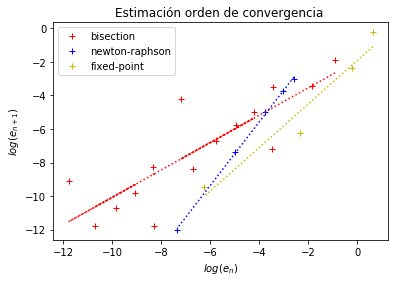

In [58]:
# Plot
plt.plot(b_e_n, b_e_n1, 'r+', label = 'bisection')
plt.plot(n_e_n, n_e_n1, 'b+', label = 'newton-raphson')
plt.plot(f_e_n, f_e_n1, 'y+', label = 'fixed-point')
plt.plot(b_e_n, y_b, 'r:')
plt.plot(n_e_n, y_n, 'b:')
plt.plot(f_e_n, y_f, 'y:')

plt.legend()
plt.xlabel('$log(e_n)$')
plt.ylabel('$log(e_{n+1})$')
plt.title('Estimación orden de convergencia ')

In [57]:
# Orders of convergence
print('The order of convergence of the Bisection method is {}'.format(b[0]))
print('The order of convergence of the Newton-Raphson method is {}'.format(n[0]))
print('The order of convergence of the Fixed Point method is {}'.format(f[0]))


The order of convergence of the Bisection method is 0.8158716751920457
The order of convergence of the Newton-Raphson method is 1.8934724763205775
The order of convergence of the Fixed Point method is 1.2963421354710218
